### Los mejores tacos de CDMX
Introducción:
EL proposito principal de este análisis es encontrar los mejores tacos de la ciudad de Mexico
quisimos llevar nuestro proyecto a otro nivel, ya que nos preguntamos si existía la posibilidad 
de encontrar los datos de el API de google maps, ya que de los datos que las personas y los negocios
proporcionan dáa a día a la plataforma de google maps son demaciado valiosos.
En CDMX y área conurbada existen más de 10000 taquerias las cueales se dividen entre locales y
negocios callejeros, así que logramos extraer una muestra de 3000 mil datos de los cuales nos surguieron 
las siguientes preguntas: 
##### -¿Cuáles son los mejores tacos de la CDMX? 
##### -¿Cuáles son los mejores tacos cerca de ESCOM? 
##### -¿Cuales son los tacos más caros? 
##### -¿Cuales son los más baratos?
##### -¿Cáles son los más pupulares? 
##### -¿Cuáles son los más recomendados? 

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
# Leer el archivo limpio y ya ordenado
df = pd.read_csv("tacos_CDMX_sorted.csv")
print('Columnas disponibles: ',df.columns.tolist())


Columnas disponibles:  ['name', 'address', 'lat', 'lng', 'rating', 'userRatingCount', 'priceLevel', 'website']


### Mostramos todas las columnas de el dataset.
Columnas disponibles:  ['name', 'address', 'lat', 'lng', 'rating', 'userRatingCount', 'priceLevel', 'website']


### Mostramos el dataset completo 

In [77]:
df

,name,address,lat,lng,rating,userRatingCount,priceLevel,website
0,El Borrego Viudo,"Av. Revolución 241, Tacubaya, Miguel Hidalgo, ...",19.399414,-99.185237,4.2,42580.0,PRICE_LEVEL_MODERATE,http://www.taqueriaelborregoviudo.mx/
1,Tortas Gigantes Sur 12,"Av Sur 12 277, Agrícola Oriental, Iztacalco, 0...",19.397021,-99.071904,4.3,33015.0,PRICE_LEVEL_MODERATE,NaN
2,Los Especiales,"Av Francisco I. Madero 71, Centro Histórico de...",19.433159,-99.134590,4.3,23855.0,PRICE_LEVEL_INEXPENSIVE,NaN
3,Taquerías el Fogón,"Av. Dr. Gustavo Baz 193B, El Mirador, 54080 Tl...",19.516865,-99.214758,4.5,23473.0,PRICE_LEVEL_MODERATE,NaN
4,"Pa’Tacos ""El Papi""","Ote 91 3229, Mártires de Río Blanco, Gustavo A...",19.460556,-99.111338,4.5,19153.0,PRICE_LEVEL_INEXPENSIVE,https://www.facebook.com/Tacos-El-Papi-2173667...
...,...,...,...,...,...,...,...,...
3120,Tacos el monkiki,"Av. Acueducto 126, San Pedro Zacatenco, Gustav...",19.508614,-99.123017,NaN,NaN,NaN,NaN
3121,Tacos Los Castigados,"Lic. Benito Juárez 4-local 4d, San Juan Ixhuat...",19.519046,-99.107378,NaN,NaN,NaN,NaN
3122,Tacos de guisado Dani,"Av. Enrique Torres Calderón 129, El Risco CTM,...",19.509832,-99.095862,NaN,NaN,NaN,NaN
3123,Tacos De Guisado,"Manzana 013, Jardines del Tepeyac, 55220 Ecate...",19.514318,-99.051786,NaN,NaN,NaN,NaN


### Filtraremos taquerías con datos utiles
Quitaremos las que no tengan calificación y después las que tengan menos de 10 calificaciones.

In [78]:
#UserRating count es el numero de calificaciones
dataFiltrada= df[df['userRatingCount']>=20]
print(dataFiltrada.shape)
dataFiltrada

(1672, 8)


,name,address,lat,lng,rating,userRatingCount,priceLevel,website
0,El Borrego Viudo,"Av. Revolución 241, Tacubaya, Miguel Hidalgo, ...",19.399414,-99.185237,4.2,42580.0,PRICE_LEVEL_MODERATE,http://www.taqueriaelborregoviudo.mx/
1,Tortas Gigantes Sur 12,"Av Sur 12 277, Agrícola Oriental, Iztacalco, 0...",19.397021,-99.071904,4.3,33015.0,PRICE_LEVEL_MODERATE,NaN
2,Los Especiales,"Av Francisco I. Madero 71, Centro Histórico de...",19.433159,-99.134590,4.3,23855.0,PRICE_LEVEL_INEXPENSIVE,NaN
3,Taquerías el Fogón,"Av. Dr. Gustavo Baz 193B, El Mirador, 54080 Tl...",19.516865,-99.214758,4.5,23473.0,PRICE_LEVEL_MODERATE,NaN
4,"Pa’Tacos ""El Papi""","Ote 91 3229, Mártires de Río Blanco, Gustavo A...",19.460556,-99.111338,4.5,19153.0,PRICE_LEVEL_INEXPENSIVE,https://www.facebook.com/Tacos-El-Papi-2173667...
...,...,...,...,...,...,...,...,...
1667,Tacos zarigüeya,"Calle pescadores, edif, Lucio Blanco 02100, El...",19.511756,-99.202968,4.9,20.0,NaN,NaN
1668,Tacos Jorge,"Av. México Coyoacán 347, Gral Anaya, Benito Ju...",19.359836,-99.163481,3.5,20.0,NaN,NaN
1669,Tacos De Mixiotes Estilo Hidalgo,"C. 4, Olivar del Conde 1ra Secc, Álvaro Obregó...",19.375605,-99.203441,4.0,20.0,NaN,NaN
1670,De Colores - cafetería y restaurante,"Carr. Picacho-Ajusco 124, Jardines en la Monta...",19.299789,-99.208974,4.9,20.0,NaN,NaN


# Como primer paso arrojaremos las taquerías mejor calificadas en la ciudad 


In [79]:
top= dataFiltrada.sort_values(by='rating',ascending=False).head(15)
top
#sort_values ordena de mayor a menor el rating


,name,address,lat,lng,rating,userRatingCount,priceLevel,website
1671,Tacos El JAROCHITO,"Atanacio G Sarabia metrobus, Escuadrón 201, Iz...",19.361126,-99.114451,5.0,20.0,NaN,NaN
1650,"Elemental: Hamburguesas, tacos y más...","Alemán 19, Progresista, Iztapalapa, 09240 Ciud...",19.361435,-99.065601,5.0,21.0,NaN,NaN
1577,Tacos Zacapoaxtla Plutarco,"Avenida Presidente Plutarco Elías Calles, Don ...",19.379378,-99.135019,5.0,25.0,NaN,NaN
1199,TACOS DE ASADA DON NACHO ¡TRAKAS!,"PEDRO BARANDA 4, Tabacalera, Cuauhtémoc, 06030...",19.436662,-99.151766,5.0,69.0,NaN,NaN
1616,Taco'n Huevos,"Av 613 215 B, San juan de aragon 4ta seccion, ...",19.456630,-99.068438,5.0,22.0,NaN,NaN
1565,Tacos Tomy,"Casa del Obrero Mundial 684, Atenor Salas, Ben...",19.402482,-99.146715,5.0,25.0,NaN,http://www.instagram.com/coffeeandtacostomy
1564,"Tacos de canasta ""Nancy""🧺🌮","Calle Benito Juárez 6, El Mirador, 54080 Tlaln...",19.517416,-99.219602,5.0,25.0,NaN,https://www.facebook.com/profile.php?id=100076...
1559,Tackoer,"Berenjena 40, Col, Lomas el Manto, Iztapalapa,...",19.349252,-99.086610,5.0,26.0,NaN,https://tackoer.ueniweb.com/?utm_campaign=gmb
1526,LOS AUTÉNTICOS TACOS HERRERA,"C. 39 10, Santa Cruz Meyehualco, Iztapalapa, 0...",19.343870,-99.040892,5.0,28.0,NaN,NaN
1643,"Tacos ""El Cuñado""","Xochiquetzal, Santa Isabel Tola, Gustavo A. Ma...",19.494116,-99.113799,5.0,21.0,NaN,NaN


In [80]:
taqueriasExcelentes= dataFiltrada[dataFiltrada['rating']>=5]
taqueriasExcelentes= taqueriasExcelentes.sort_values(by='userRatingCount', ascending=False).head(300)
print(taqueriasExcelentes.shape)
taqueriasExcelentes
#Aqui podemos visualizzar las taquerías mejor calificadas y con un gran numero de reviews

(19, 8)


,name,address,lat,lng,rating,userRatingCount,priceLevel,website
1005,"Tacos Luigi ""El profesional ""","C. 710 57189, Amp San Juan de Aragón CTM, 0799...",19.456985,-99.054157,5.0,124.0,NaN,NaN
1199,TACOS DE ASADA DON NACHO ¡TRAKAS!,"PEDRO BARANDA 4, Tabacalera, Cuauhtémoc, 06030...",19.436662,-99.151766,5.0,69.0,NaN,NaN
1348,"Mexican Tacos, Col. Roma","Coahuila 148, Roma Nte., Cuauhtémoc, 06700 Cua...",19.411158,-99.162863,5.0,47.0,NaN,https://www.mxtacos.mx/
1372,TACOS EL DON,"Boulevard cataratas, sin número esquina, Llanu...",19.310281,-99.200957,5.0,44.0,NaN,NaN
1415,"Tacos y burritos ""la china""","Calle . San Lorenzo, esquina con, C. Gabriel M...",19.373411,-99.167576,5.0,38.0,NaN,NaN
1490,Parrilla Leon,"Av. John F. Kennedy 5 B, Emiliano Zapata 2da S...",19.504901,-99.065134,5.0,32.0,NaN,https://www.tiktok.com/@ivan.hernndez7576
1526,LOS AUTÉNTICOS TACOS HERRERA,"C. 39 10, Santa Cruz Meyehualco, Iztapalapa, 0...",19.343870,-99.040892,5.0,28.0,NaN,NaN
1559,Tackoer,"Berenjena 40, Col, Lomas el Manto, Iztapalapa,...",19.349252,-99.086610,5.0,26.0,NaN,https://tackoer.ueniweb.com/?utm_campaign=gmb
1577,Tacos Zacapoaxtla Plutarco,"Avenida Presidente Plutarco Elías Calles, Don ...",19.379378,-99.135019,5.0,25.0,NaN,NaN
1565,Tacos Tomy,"Casa del Obrero Mundial 684, Atenor Salas, Ben...",19.402482,-99.146715,5.0,25.0,NaN,http://www.instagram.com/coffeeandtacostomy


##### explicar esta mamada

In [81]:
#con value_counts()contamos el numero de calificaciones por rating
# y lo ordenamos con sort_index()
# Esto nos da una idea de la distribucion de las calificaciones
numero_calificaciones= dataFiltrada['rating'].value_counts().sort_index()
numero_calificaciones


rating
2.0      1
2.1      1
2.3      1
2.5      1
2.6      1
3.1      1
3.2      2
3.3      5
3.4      4
3.5      8
3.6      9
3.7      8
3.8     31
3.9     29
4.0     69
4.1    114
4.2    152
4.3    245
4.4    285
4.5    234
4.6    230
4.7    133
4.8     55
4.9     34
5.0     19
Name: count, dtype: int64

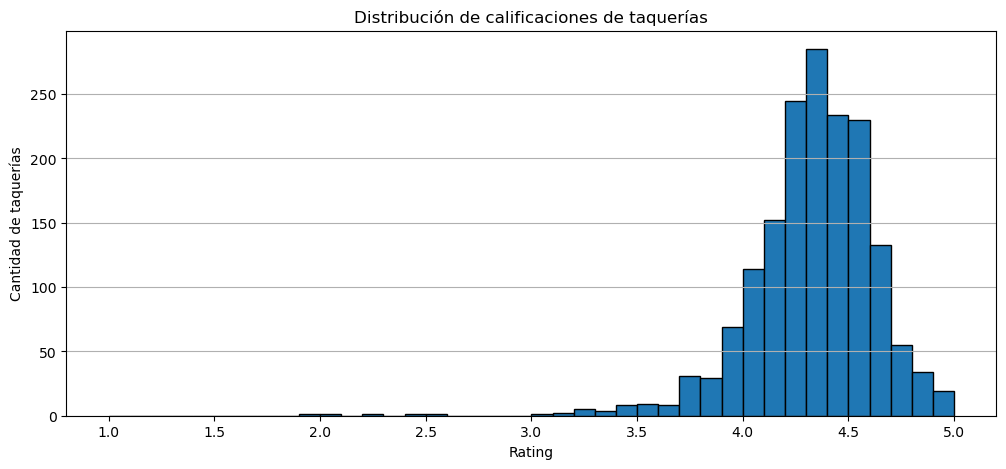

In [82]:
# Graficar la distribución de calificaciones
plt.figure(figsize=(12, 5))
plt.hist(dataFiltrada['rating'], bins=np.arange(1, 5.1, 0.1), edgecolor='black')
plt.title('Distribución de calificaciones de taquerías')
plt.xlabel('Rating')
plt.ylabel('Cantidad de taquerías')
plt.grid(axis='y')
plt.show()

##### Promedio de calificaciones
Primero analizamos el promedio del taset completo.
Después el promedio de el daataset ya filtrados, sin las taquerías que tienen menos de 5 calificaciones.


In [83]:
print('Media  general de calificaciones: ', df['rating'].mean())
print('Media  general de calificaciones filtradas: ', dataFiltrada['rating'].mean())

Media  general de calificaciones:  4.436426116838488
Media  general de calificaciones filtradas:  4.3797846889952154


####### Con el promedio general de calificaciones es de 4.43 nos damos cuenta que la mayoría de los tacos con más calificaciones estan por debajo del promedio, por lo tanto nos podemos tomar el numero de calificaciones como la metrica para conseguir el mejor taco de la cuidad. 

####


#### Mostraremos las taquerías y las calificaciones pero en lugar de una tabla las muestra con un punto.


Coeficiente (pendiente): -9.694925042339167e-06
Intercepto: 4.388915093396237


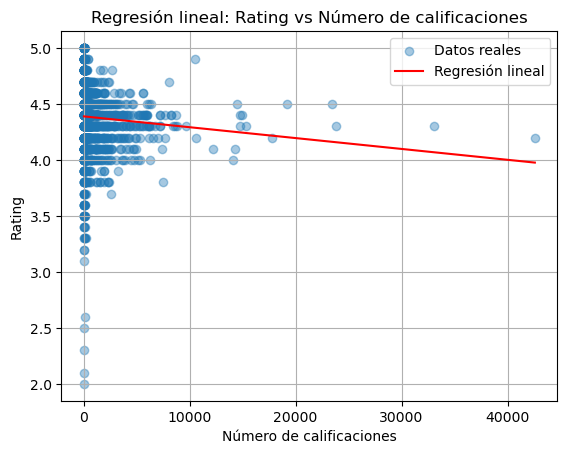

In [84]:

# Extraer los datos
X = dataFiltrada['userRatingCount'].values
y = dataFiltrada['rating'].values

# Calcular la pendiente (m) y el intercepto (b) de la recta: y = mX + b
m, b = np.polyfit(X, y, 1)  # Regresión lineal de grado 1

# Predicción
y_pred = m * X + b

# Imprimir coeficientes
print("Coeficiente (pendiente):", m)
print("Intercepto:", b)

# Gráfica
plt.scatter(X, y, alpha=0.4, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.xlabel('Número de calificaciones')
plt.ylabel('Rating')
plt.title('Regresión lineal: Rating vs Número de calificaciones')
plt.legend()
plt.grid(True)
plt.show()